Data Source: https://bladdercancersupport.org/

Forum Name:
1.    Newly Diagnosed, New To The Forum
2.    Non Invasive Bladder Cancer
3.    Muscle Invasive Bladder Cancer
4.    Metastatic Bladder Cancer
5.    Women and Bladder Cancer
6.    Men and Bladder Cancer
7.    Caregivers Questions and Comments
8.    Articles of Interest
9.    Chit Chat
10.    "How To" Information
11.    Site Notices

In [5]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os, json
from operator import gt

import pandas as pd
from functools import reduce
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Important Links:https:
https://www.analyticsvidhya.com/blog/2018/10/mining-online-reviews-topic-modeling-lda/
https://radimrehurek.com/gensim/models/ldamulticore.html
https://radimrehurek.com/gensim/models/ldamodel.html
https://www.kaggle.com/ktattan/lda-and-document-similarity
https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions

In [2]:
stop    = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma   = WordNetLemmatizer()

'''>>> from functools import reduce
    def deep_get(dictionary, keys, default=None):
    ...     return reduce(lambda d, key: d.get(key, default) if isinstance(d, dict) else default, keys.split("."), dictionary)
    Application:
    person = {'person':{'name':{'first':'John'}}}
    print (deep_get(person, "person.name.first"))
    output: John
    print (deep_get(person, "person.name.lastname"))
    output: None
    print (deep_get(person, "person.name.lastname", default="No lastname"))
    output: No lastname'''

In [68]:
def createDataFrame(path_to_json):
    # listing all json files      
    json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
    #     print(json_files)

    #     point of interests
    author_List = []
    signature_List = []
    # treatment_List = []
    forum_id_List = []
    forum_List = []
    topic_List = [] # Topic title
    # postType_List = [] # original or reply
    text_List = [] # content of post
    time_List = [] # mm/dd/yyyy
    time_MM = [] # month
    time_DD = [] # date
    time_YYYY = [] # year

    for files in json_files:   
    #     print(files)
        JSON_PATH = os.path.join(path_to_json,files)
        with open(JSON_PATH) as data_file:
            data = json.load(data_file)       
            for post_idx in range(0,len(data['posts'])):
                author_List.append(files.split('.json')[0])
                signature_List.append(" ".join([text for text in data['signature']]))
                forum_id_List.append(data['posts'][post_idx]['subforum'].split('-')[0])
                forum_List.append((" ".join([text for text in data['posts'][post_idx]['subforum'].split('-')[1:]])))
                topic_List.append(data['posts'][post_idx]['topic'])
                text_List.append(re.sub('\s+', ' ', data['posts'][post_idx]['text']))
                time_extracted = data['posts'][post_idx]['date'].split('T')[0].split('-')
                time_List.append(time_extracted[1]+'/'+time_extracted[2]+'/'+time_extracted[0])
                time_MM.append(time_extracted[1])
                time_DD.append(time_extracted[2])
                time_YYYY.append(time_extracted[0])

    mergeDict={'author': author_List, 'signature': signature_List,
               'forum_id':forum_id_List, 'forum':forum_List,
               'topic':topic_List, 'text': text_List,  
               'time': time_List, 'month': time_MM, 'day': time_DD, 'year': time_YYYY}
    mergeData = pd.DataFrame(mergeDict)
    return mergeData

<>:31: DeprecationWarning: invalid escape sequence \s
<>:31: DeprecationWarning: invalid escape sequence \s
<>:31: DeprecationWarning: invalid escape sequence \s
<ipython-input-68-a13d2b5bd216>:31: DeprecationWarning: invalid escape sequence \s
  text_List.append(re.sub('\s+', ' ', data['posts'][post_idx]['text']))


In [69]:
path_to_json = "C:\\Users\\tanmo\\OneDrive - George Mason University\\LabWork\\HealthForum\\SourceCode\\data\\bladderCancer_users\\" 
mergedf = createDataFrame(path_to_json)
# save as csv file
mergedf.to_csv(r'C:\\Users\\tanmo\\OneDrive - George Mason University\\LabWork\\HealthForum\\SourceCode\\pointOfInterest_bladderCancer.csv')

In [77]:
mergedf.head()

,author,signature,forum_id,forum,topic,text,time,month,day,year
0,Alan,Dx BCG,3,newly diagnosed,my latest urine cytology,"I'd simply wait for your doctor as he has all of your history and files. For peace of mind it is good you are seeing him in two days. That said, urine cytology is notorious for false positives. I...",02/24/2021,02,24,2021
1,Alan,Dx BCG,3,newly diagnosed,VETERANS - New Conditions Added to Agent Orange Presumptive List,"Jack, Thanks for the info. I have a good friend with Parkinson's that continues downhill from his 2 years in Nam.",02/09/2021,02,09,2021
2,Alan,Dx BCG,3,newly diagnosed,Recently Diagnosed,"Skyking 76, Welcome. I am not making excuses for the Doc's slow response except to say COVID has changed a lot of protocols and timing. At the same time, you are paying for expertise to where if ...",02/06/2021,02,06,2021
3,Alan,Dx BCG,3,newly diagnosed,Recently diagnosed &amp;amp; scared,"I am not in your shoes but, I tell myself the cysto is usually no more than 5-10 minutes and it is over. Is it fun? No! However, I wouldn't want an OR visit as I have been knocked out too many ti...",09/27/2020,09,27,2020
4,Alan,Dx BCG,3,newly diagnosed,Recently diagnosed &amp;amp; scared,Sorry for the reason to renter the forum. This is still treatable and beatable. Ask as you go.,02/06/2021,02,06,2021


Text(0, 0.5, 'participation')

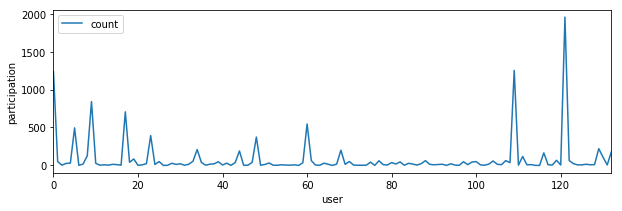

In [78]:
mergedf.groupby('author').size().reset_index(name='count').plot(figsize=(10,3))
plt.xlabel('user')
plt.ylabel('participation')

# mergedf[mergedf.author.str.contains('evilelf',case=False)].groupby('time').size().reset_index(name='count')).sort_values() # time range

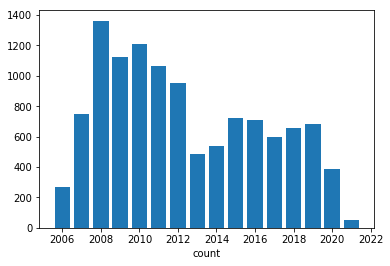

In [199]:
# checking post number by year
df_year = df.groupby(['year'], sort=False).size().reset_index(name='Count')
df_year.sort_values("Count", axis = 0, ascending = True, 
                 inplace = True, na_position ='first')
# print(df_author)
plt.bar(df_year['year'], df_year['Count'])
plt.xlabel('year')
plt.xlabel('count')
plt.show()

In [79]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

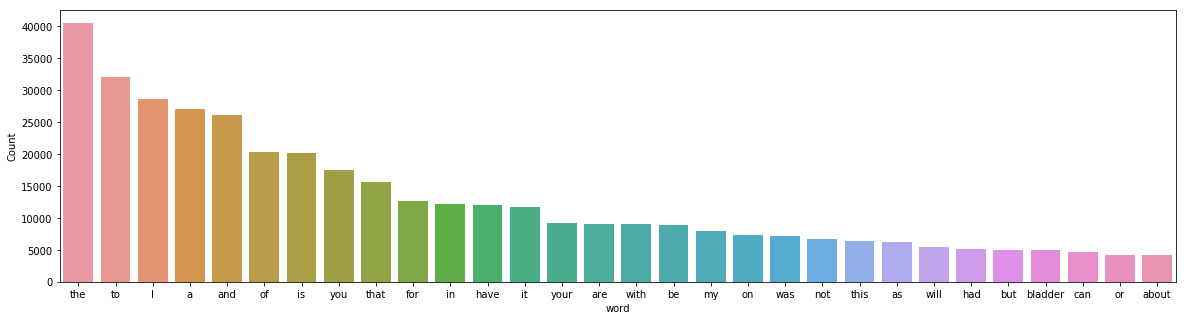

In [80]:
# Frequent words
freq_words(mergedf['text'])

In [81]:
# remove unwanted characters, numbers and symbols
mergedf['text'] = mergedf['text'].str.replace("[^a-zA-Z#]", " ")

In [82]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [84]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
# df['Moderators'] = df['Moderators'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
mergedf['text'] = mergedf['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
# reviews = [remove_stopwords(r.split()) for r in df['Moderators']]

reviews = [remove_stopwords(r.split()) for r in mergedf['text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

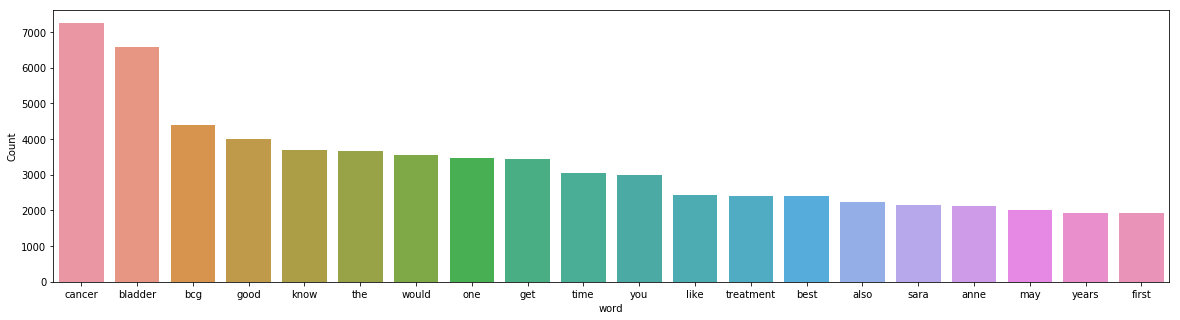

In [85]:
freq_words(reviews, 20)

!python -m spacy download en # one time run

In [86]:
import spacy
from spacy.lang.en import English

nlp = spacy.load('en_core_web_sm')

# nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [87]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['jack', 'thanks', 'info', 'good', 'friend', 'parkinson', 'continues', 'downhill', 'years', 'nam']


In [88]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['jack', 'thank', 'good', 'friend', 'parkinson', 'year', 'nam']


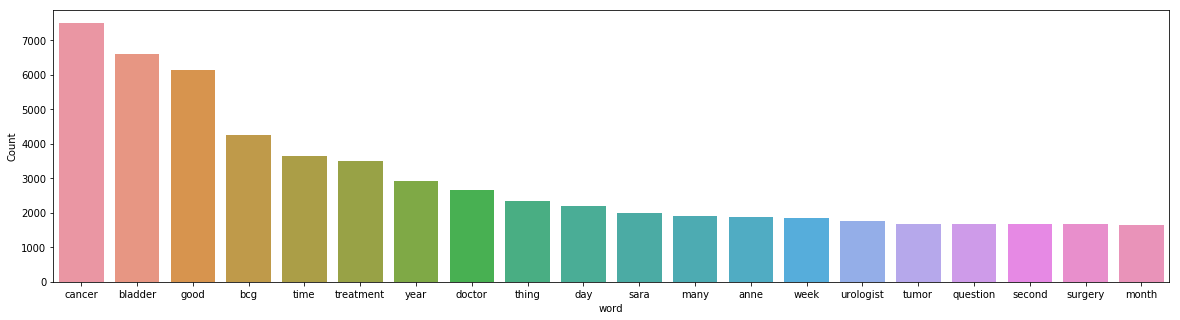

In [89]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

# df['reviews'] = reviews_3
mergedf['reviews'] = reviews_3

# freq_words(df['reviews'], 20)
freq_words(mergedf['reviews'], 20)
# singleUser_data.head()

In [90]:
# Creating the object for LDA model using gensim library
dictionary = corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [16]:
# Save Doc term matrix
import pickle

f = open('rest_doc_term_matrix.pckl', 'wb')
pickle.dump(doc_term_matrix, f)
f.close()


In [ ]:
f1 = open('dictionary.pckl', 'wb')
pickle.dump(dictionary, f1)
f1.close()

In [91]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=6, random_state=100,
                chunksize=1000, passes=50)

In [109]:
# Visualize the topics
# lda_model.print_topics()
lda_model.show_topic(topicid=3, topn=30)

[('cancer', 0.049607746),
 ('bladder', 0.04821316),
 ('good', 0.022454334),
 ('sara', 0.019977184),
 ('anne', 0.01912918),
 ('urologist', 0.01626984),
 ('treatment', 0.0152595565),
 ('doctor', 0.01487245),
 ('grade', 0.013573473),
 ('tumor', 0.013424198),
 ('second', 0.013270894),
 ('opinion', 0.010828803),
 ('high', 0.009470746),
 ('year', 0.009219362),
 ('many', 0.00915878),
 ('turb', 0.008536704),
 ('diagnosis', 0.008458544),
 ('question', 0.008096003),
 ('time', 0.0065636975),
 ('low', 0.00636202),
 ('case', 0.0063510663),
 ('report', 0.0062878416),
 ('invasive', 0.0058607934),
 ('thing', 0.0057563814),
 ('test', 0.0055545014),
 ('bcg', 0.005538334),
 ('biopsy', 0.0050484813),
 ('lot', 0.0048580593),
 ('first', 0.004785748),
 ('pathology', 0.0047754045)]

In [97]:
# Save Topics
forumModel=str(lda_model.print_topics())
# print(forumModel)
outfile = 'C:\\Users\\tanmo\\OneDrive - George Mason University\\LabWork\\HealthForum\\SourceCode\\modelResults\\topicModelingBladderCancer.txt'
with open(outfile, 'w') as f:
    for item in forumModel:
        f.write("%s\n" % item)

In [110]:
# plotting the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\tanmo\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.042687 -0.119068       1        1  33.955254
2      0.088218  0.068363       2        1  19.655613
0      0.101731 -0.150188       3        1  16.336460
1      0.041000 -0.138840       4        1  10.533873
4     -0.359827  0.091135       5        1   9.909273
5      0.171565  0.248598       6        1   9.609537, topic_info=     Category         Freq       Term        Total  loglift  logprob
30    Default  4238.000000        bcg  4238.000000  30.0000  30.0000
107   Default  7340.000000     cancer  7340.000000  29.0000  29.0000
8     Default  5645.000000       good  5645.000000  28.0000  28.0000
105   Default  6420.000000    bladder  6420.000000  27.0000  27.0000
122   Default  1146.000000       news  1146.000000  26.0000  26.0000
326   Default  3461.000000  treatment  3461.000000  25.0000  25.0000
128   Default  1533.000000    surgery  1533.000000  24.0000  24.0000
352   Default  1271.000000      great  1271.000000  23.0000  23.0000
464   Default  1339.000000    patient  1339.000000  22.0000  22.0000
209   Default  2478.000000       sara  2478.000000  21.0000  21.0000
196   Default  2363.000000       anne  2363.000000  20.0000  20.0000
178   Default  1722.000000       week  1722.000000  19.0000  19.0000
97    Default   925.000000     effect   925.000000  18.0000  18.0000
171   Default  1534.000000      grade  1534.000000  17.0000  17.0000
971   Default  2034.000000  urologist  2034.000000  16.0000  16.0000
102   Default  1007.000000       side  1007.000000  15.0000  15.0000
4     Default  1904.000000        day  1904.000000  14.0000  14.0000
72    Default  1580.000000      tumor  1580.000000  13.0000  13.0000
146   Default  1574.000000     second  1574.000000  12.0000  12.0000
143   Default  1224.000000    opinion  1224.000000  11.0000  11.0000
804   Default   565.000000        www   565.000000  10.0000  10.0000
296   Default  1514.000000      month  1514.000000   9.0000   9.0000
29    Default  1037.000000      thank  1037.000000   8.0000   8.0000
751   Default   480.000000    article   480.000000   7.0000   7.0000
85    Default  2203.000000      thing  2203.000000   6.0000   6.0000
328   Default   485.000000   catheter   485.000000   5.0000   5.0000
298   Default   884.000000       pain   884.000000   4.0000   4.0000
789   Default   464.000000        com   464.000000   3.0000   3.0000
70    Default  3298.000000       time  3298.000000   2.0000   2.0000
289   Default   649.000000      happy   649.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1359   Topic6    42.360573      claim    43.212273   2.3225  -6.6266
946    Topic6   238.219086       mark   271.770477   2.2106  -4.8997
352    Topic6   809.838257      great  1271.946533   1.8909  -3.6760
1732   Topic6   257.149445     george   393.524353   1.9169  -4.8232
2088   Topic6   118.791008        bed   153.761276   2.0844  -5.5955
289    Topic6   342.659149      happy   649.422607   1.7031  -4.5361
647    Topic6   216.802139  wonderful   353.137909   1.8545  -4.9939
8      Topic6  1698.453125       good  5645.468750   1.1413  -2.9354
1875   Topic6   391.778473       mike   857.470215   1.5591  -4.4022
29     Topic6   448.870331      thank  1037.229370   1.5048  -4.2661
707    Topic6   106.757004      tough   142.009003   2.0571  -5.7023
99     Topic6   300.634918       glad   661.173828   1.5543  -4.6670
1721   Topic6   146.520279       love   257.831848   1.7773  -5.3857
465    Topic6   357.998840       hope  1105.547363   1.2148  -4.4923
884    Topic6   309.110443       luck   922.765015   1.2487  -4.6392
1054   Topic6   126.534203       hear   207.240250   1.8490  -5.5323
4      Topic6   429.488831        day  1904.727295   0.8529  -4.3103
204    Topic6   294.763153       life  1071.980469   1.0513  -4.6867
85     Topic6   417.992737      thing  2203.319092   0.6802  -4.3374
187   

In [111]:
# save plot
pyLDAvis.save_html(vis, 'topicModel_bladderCancer.html')

In [118]:
# finding the username with maximum treatment signature
str(mergedf.iloc[mergedf.signature.str.split(" ").str.len().argmax()]['author'])
str(mergedf.iloc[mergedf.signature.str.split(" ").str.len().argmax()]['signature'])


C:\Users\tanmo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


'Dx Dx TURBT Dx TURBT BCG Dx TURBT BCG Dx'

In [123]:
# stages
# mergedf.signature.str.split(" ")
set(mergedf['signature'].str.cat(sep=' ').split(' '))

{'BCG', 'Chemotherapy', 'Dx', 'Surgery', 'TURBT'}

# Text Processing

In [124]:

df = pd.read_csv("C://Users//tanmo//OneDrive - George Mason University//LabWork//HealthForum//SourceCode//pointOfInterest_bladderCancer.csv")
df.head()

,Unnamed: 0,author,signature,forum_id,forum,topic,text,time,month,day,year
0,0,Alan,Dx BCG,3,newly diagnosed,my latest urine cytology,"I'd simply wait for your doctor as he has all of your history and files. For peace of mind it is good you are seeing him in two days. That said, urine cytology is notorious for false positives. I...",2/24/2021,2,24,2021
1,1,Alan,Dx BCG,3,newly diagnosed,VETERANS - New Conditions Added to Agent Orange Presumptive List,"Jack, Thanks for the info. I have a good friend with Parkinson's that continues downhill from his 2 years in Nam.",2/9/2021,2,9,2021
2,2,Alan,Dx BCG,3,newly diagnosed,Recently Diagnosed,"Skyking 76, Welcome. I am not making excuses for the Doc's slow response except to say COVID has changed a lot of protocols and timing. At the same time, you are paying for expertise to where if ...",2/6/2021,2,6,2021
3,3,Alan,Dx BCG,3,newly diagnosed,Recently diagnosed &amp;amp; scared,"I am not in your shoes but, I tell myself the cysto is usually no more than 5-10 minutes and it is over. Is it fun? No! However, I wouldn't want an OR visit as I have been knocked out too many ti...",9/27/2020,9,27,2020
4,4,Alan,Dx BCG,3,newly diagnosed,Recently diagnosed &amp;amp; scared,Sorry for the reason to renter the forum. This is still treatable and beatable. Ask as you go.,2/6/2021,2,6,2021


In [126]:
# Number of words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
# df[['forumTopicText','word_count']].head()
# Number of charactters
df['char_count'] = df['text'].str.len() ## this also includes spaces
df[['text','word_count','char_count']].head()

,text,word_count,char_count
0,"I'd simply wait for your doctor as he has all of your history and files. For peace of mind it is good you are seeing him in two days. That said, urine cytology is notorious for false positives. I...",115,591
1,"Jack, Thanks for the info. I have a good friend with Parkinson's that continues downhill from his 2 years in Nam.",23,115
2,"Skyking 76, Welcome. I am not making excuses for the Doc's slow response except to say COVID has changed a lot of protocols and timing. At the same time, you are paying for expertise to where if ...",181,936
3,"I am not in your shoes but, I tell myself the cysto is usually no more than 5-10 minutes and it is over. Is it fun? No! However, I wouldn't want an OR visit as I have been knocked out too many ti...",69,349
4,Sorry for the reason to renter the forum. This is still treatable and beatable. Ask as you go.,20,96


In [ ]:
# Average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(str(x)))
df[['text','avg_word']].head()

In [129]:
# Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,"I'd simply wait for your doctor as he has all of your history and files. For peace of mind it is good you are seeing him in two days. That said, urine cytology is notorious for false positives. I...",49
1,"Jack, Thanks for the info. I have a good friend with Parkinson's that continues downhill from his 2 years in Nam.",9
2,"Skyking 76, Welcome. I am not making excuses for the Doc's slow response except to say COVID has changed a lot of protocols and timing. At the same time, you are paying for expertise to where if ...",84
3,"I am not in your shoes but, I tell myself the cysto is usually no more than 5-10 minutes and it is over. Is it fun? No! However, I wouldn't want an OR visit as I have been knocked out too many ti...",29
4,Sorry for the reason to renter the forum. This is still treatable and beatable. Ask as you go.,8


In [130]:
# Number of special characters
df['hastags'] = df['text'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
df[['text','hastags']].head()

,text,hastags
0,"I'd simply wait for your doctor as he has all of your history and files. For peace of mind it is good you are seeing him in two days. That said, urine cytology is notorious for false positives. I...",0
1,"Jack, Thanks for the info. I have a good friend with Parkinson's that continues downhill from his 2 years in Nam.",0
2,"Skyking 76, Welcome. I am not making excuses for the Doc's slow response except to say COVID has changed a lot of protocols and timing. At the same time, you are paying for expertise to where if ...",0
3,"I am not in your shoes but, I tell myself the cysto is usually no more than 5-10 minutes and it is over. Is it fun? No! However, I wouldn't want an OR visit as I have been knocked out too many ti...",0
4,Sorry for the reason to renter the forum. This is still treatable and beatable. Ask as you go.,0


In [131]:
# Number of numerics
df['numerics'] = df['text'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
df[['text','numerics']].head()

,text,numerics
0,"I'd simply wait for your doctor as he has all of your history and files. For peace of mind it is good you are seeing him in two days. That said, urine cytology is notorious for false positives. I...",2
1,"Jack, Thanks for the info. I have a good friend with Parkinson's that continues downhill from his 2 years in Nam.",1
2,"Skyking 76, Welcome. I am not making excuses for the Doc's slow response except to say COVID has changed a lot of protocols and timing. At the same time, you are paying for expertise to where if ...",1
3,"I am not in your shoes but, I tell myself the cysto is usually no more than 5-10 minutes and it is over. Is it fun? No! However, I wouldn't want an OR visit as I have been knocked out too many ti...",1
4,Sorry for the reason to renter the forum. This is still treatable and beatable. Ask as you go.,0


In [132]:
# Number of uppercase words
df['upper'] = df['text'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
df[['text','upper']].head()

,text,upper
0,"I'd simply wait for your doctor as he has all of your history and files. For peace of mind it is good you are seeing him in two days. That said, urine cytology is notorious for false positives. I...",6
1,"Jack, Thanks for the info. I have a good friend with Parkinson's that continues downhill from his 2 years in Nam.",1
2,"Skyking 76, Welcome. I am not making excuses for the Doc's slow response except to say COVID has changed a lot of protocols and timing. At the same time, you are paying for expertise to where if ...",8
3,"I am not in your shoes but, I tell myself the cysto is usually no more than 5-10 minutes and it is over. Is it fun? No! However, I wouldn't want an OR visit as I have been knocked out too many ti...",5
4,Sorry for the reason to renter the forum. This is still treatable and beatable. Ask as you go.,0


In [133]:
# Removing non-ASCII characters
import re, string, unicodedata
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

df['text'] = df['text'].apply(lambda x: " ".join(remove_non_ascii(str(x).split())))

In [134]:
# Removing contraction. For example: Don't == do not
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# test = "Hey I'm Yann, how're you and how's it going ? That's interesting: I'd love to hear more about it."
# print(decontracted(test))

df['text'] = df['text'].apply(lambda x: decontracted(x))

In [135]:
# Making Lower Case
# No changing if all are upper case as like US. Because US = United states. But 'I' should be lowered as it is a stopword
df['text'] = df['text'].apply(lambda x: " ".join(y.lower() if not (y.isupper() and y!='I') else y for y in str(x).split() ))
# df['forumTopicText'].head()
df.iloc[0]['text']

'i would simply wait for your doctor as he has all of your history and files. for peace of mind it is good you are seeing him in two days. that said, urine cytology is notorious for false positives. i had one about 6 or 7 years ago that showed something abnormal with my GP and annual physical. he insisted i see my URO which when i showed up he said "what are you here for"? he had reviewed it and it was nothing. cytology with cystoscope usually confirms something suspicious or simply nothing which is what i would expect. let us know what your doc says as many can relate to your situation.'

In [137]:
# Removing punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')
df.iloc[0]['text']

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-137-ffca63af52de>:2: DeprecationWarning: invalid escape sequence \w
  df['text'] = df['text'].str.replace('[^\w\s]','')


'i would simply wait for your doctor as he has all of your history and files for peace of mind it is good you are seeing him in two days that said urine cytology is notorious for false positives i had one about 6 or 7 years ago that showed something abnormal with my GP and annual physical he insisted i see my URO which when i showed up he said what are you here for he had reviewed it and it was nothing cytology with cystoscope usually confirms something suspicious or simply nothing which is what i would expect let us know what your doc says as many can relate to your situation'

In [138]:
import inflect
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

df['text'] = df['text'].apply(lambda x: " ".join(replace_numbers(x.split())))
df.iloc[0]['text']

'i would simply wait for your doctor as he has all of your history and files for peace of mind it is good you are seeing him in two days that said urine cytology is notorious for false positives i had one about six or seven years ago that showed something abnormal with my GP and annual physical he insisted i see my URO which when i showed up he said what are you here for he had reviewed it and it was nothing cytology with cystoscope usually confirms something suspicious or simply nothing which is what i would expect let us know what your doc says as many can relate to your situation'

In [139]:
# Removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.iloc[0]['text']

'would simply wait doctor history files peace mind good seeing two days said urine cytology notorious false positives one six seven years ago showed something abnormal GP annual physical insisted see URO showed said reviewed nothing cytology cystoscope usually confirms something suspicious simply nothing would expect let us know doc says many relate situation'

In [140]:
# Checking 25 most commonly words
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:25]
freq
# # For removing freq words
# freq = list(freq.index)
# df['forumTopicText'] = df['forumTopicText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# df['forumTopicText'].head()

cancer       6636
bladder      6217
one          4372
BCG          4201
would        4160
good         3911
know         3653
get          3415
time         2985
two          2734
like         2397
best         2358
us           2312
treatment    2291
also         2219
sara         2136
anne         2091
may          1975
go           1920
years        1909
first        1896
back         1861
many         1842
doctor       1837
well         1800
dtype: int64

In [141]:
# rare words
# rare = pd.Series(' '.join(df['forumTopicText']).split()).value_counts()[-100:]
rare = pd.Series(' '.join(df['text']).split()).value_counts()<5
# rare
rare = rare[rare == True]
# rare.where(rare <5)

In [142]:
# For removing rare words
rare = list(rare.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df.iloc[0]['text']

'would simply wait doctor history files peace mind good seeing two days said urine cytology notorious false positives one six seven years ago showed something abnormal GP annual physical insisted see URO showed said reviewed nothing cytology cystoscope usually confirms something suspicious simply nothing would expect let us know doc says many relate situation'

In [143]:
# Lemmatization: Lemmatization is the process of converting a word to its base form. ‘Caring’ -> Lemmatization -> ‘Care’
from nltk.stem import LancasterStemmer, WordNetLemmatizer
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

# lemmas = lemmatize_verbs(words)

df['text']= df['text'].apply(lambda x: " ".join(lemmatize_verbs(x.split())))
df.iloc[0]['text']


'would simply wait doctor history file peace mind good see two days say urine cytology notorious false positives one six seven years ago show something abnormal GP annual physical insist see URO show say review nothing cytology cystoscope usually confirm something suspicious simply nothing would expect let us know doc say many relate situation'

In [151]:
# Removing Username
username = list((set(df['author'])))
usernameLower = [x.lower() for x in username]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in usernameLower))

In [152]:
# save as csv file
df.to_csv(r'C:\\Users\\tanmo\\OneDrive - George Mason University\\LabWork\\HealthForum\\SourceCode\\pointOfInterest_bladderCancer_withProperLemma.csv')

In [ ]:
# Dropping NaN values
df_train = df_train[pd.notnull(df_train['text'])]

In [154]:
# Making text data 
# Stages: 'BCG', 'Chemotherapy', 'Dx', 'Surgery', 'TURBT'
def merge_rows(dataframe1):
    list_Text = []
    for index, row in dataframe1.iterrows():
        list_Text.append(row['text'])
    all_txt = ' '.join([str(elem) for elem in list_Text])
    merge_dict = {}
    merge_dict['text'] = all_txt
    #     merge_dict['forumTopicText'] = str(list_Text)
    return merge_dict

# keywords=['BCG', 'Chemotherapy', 'Dx', 'Surgery', 'TURBT']
# df_test = pd.read_csv('csvFiles/processed_topicPostByStageWoUserName.csv')

# df_test = pd.read_csv('csvFiles/processed_post_reply_ByStageWoUserName_withTrainCorpusIDF.csv')
df_train2 = df[pd.notnull(df['signature'])]

# DX
dx_data = merge_rows(df_train2[df_train2.signature.str.contains('Dx',case=False)])
                        
# Surgery
surgery_data = merge_rows(df_train2[df_train2.signature.str.contains('Surgery',case=False)])
                        
# Chemotherapy
chemo_data = merge_rows(df_train2[df_train2.signature.str.contains('Chemotherapy',case=False)])
                        
# TURBT
TURB_data = merge_rows(df_train2[df_train2.signature.str.contains('TURBT',case=False)])
                        
# BCG
BCG_data = merge_rows(df_train2[df_train2.signature.str.contains('BCG',case=False)])
                        



df_test = pd.DataFrame([dx_data, surgery_data, chemo_data, TURB_data, BCG_data])

# df_test.to_csv('processed_text_ByStageWoUserName_withTrainCorpusIDF.csv')
# df.to_csv('topicPostByStage.csv', index=False)
del(df_train2,dx_data, surgery_data, chemo_data, TURB_data, BCG_data )


In [161]:
# # TF-IDF option-1
from sklearn.feature_extraction.text import TfidfVectorizer

# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
# min_df = 5 means "ignore terms that appear in less than 5 documents".
# tfidf = TfidfVectorizer(max_features=1000, lowercase=False, analyzer='word', stop_words= 'english',ngram_range=(1,1))
# tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))

# tfidf = TfidfVectorizer(max_df = 0.50,min_df=0.01 lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))

tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))

# Learn vocabulary and idf, return term-document matrix.
# tfidf_vect = tfidf.fit_transform(df['forumTopicText'])
# tfidf_vect = tfidf.fit_transform(df['text'])

# tfidf_vectorizer=TfidfVectorizer(use_idf=True)
# Learn vocabulary and idf from training set.
fitted_vectorizer=tfidf.fit(df['text'])
# Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform).
# tfidf_vectorizer_vectors=fitted_vectorizer.transform(df['text'])
# tfidf_vectorizer_vectors=fitted_vectorizer.transform(df_test.iloc[4]['text'])
tfidf_vectorizer_vectors=fitted_vectorizer.transform(df_test['text'])
df1 = pd.DataFrame(tfidf_vectorizer_vectors.toarray(), columns=fitted_vectorizer.get_feature_names())
df2 = df1.transpose()
df2.to_csv('tfidf_post_reply_ByStageWoUserName_withTrainCorpusIDF_properLemma_BladderCancer.csv')


In [181]:
# Tuning TFIDF
# tuned_TFIDF = np.sqrt(tfidf_vectorizer_vectors.toarray() / fitted_vectorizer.idf_)*fitted_vectorizer.idf_
# tuned_TFIDF = np.sqrt(np.sqrt(tfidf_vectorizer_vectors.toarray() / fitted_vectorizer.idf_))*fitted_vectorizer.idf_
tuned_TFIDF = np.sqrt(np.sqrt(np.sqrt(tfidf_vectorizer_vectors.toarray() / fitted_vectorizer.idf_)))*fitted_vectorizer.idf_
df_tuned1 = pd.DataFrame(tuned_TFIDF, columns=fitted_vectorizer.get_feature_names())
df_tuned = df_tuned1.transpose()
df_tuned.columns =['Dx', 'Surgery', 'Chemo', 'TURB', 'BCG'] 
df_tuned.to_csv('tfidf_tuned_BladderCancer.csv')

In [163]:
# Getting top TFIDF
feature_array = np.array(fitted_vectorizer.get_feature_names())
tfidf_sorting = np.argsort(tfidf_vectorizer_vectors.toarray()).flatten()[::-1]

n = 3
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['cancer', 'bladder', 'bcg'], dtype='<U108')

In [192]:
# sorting keywords based on DX 
df_tuned.sort_values("Dx", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
top100Dx = df_tuned.index.tolist()[0:100]
# sorting keywords based on Surgery
df_tuned.sort_values("Surgery", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
top100Surgery = df_tuned.index.tolist()[0:100]
# sorting keywords based on Chemo
df_tuned.sort_values("Chemo", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
top100Chemo = df_tuned.index.tolist()[0:100]
# sorting keywords based on TURB 
df_tuned.sort_values("TURB", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
top100TURB = df_tuned.index.tolist()[0:100]
# sorting keywords based on BCG 
df_tuned.sort_values("BCG", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
top100BCG = df_tuned.index.tolist()[0:100]
keywords = list(set(top100Dx+top100Surgery+top100Chemo+top100Chemo+top100BCG))
keywords.insert(0,'<GO>')
keywords.insert(1,'<EOS>')
keywords.insert(2,'<unk>')
len(keywords)
with open('word.idx', 'w') as f:
    count=0
    for item in keywords:
        count+=1
        f.write('{} {}\n'.format(item, count))